# Trabajo Práctico 0:  Algoritmo de Maximización de la Esperanza

**Profesor**: Saúl Calderón Ramírez

**Estudiantes**:

* Ricardo Chacon
* Marco Ferraro
* Gabriel Valentine


## 1. Algoritmo de Maximización de la Esperanza con datos artificiales

En esta sección se llevará a cabo una implementación de un algoritmo de maximización de la esperanza. Se utilizará un grupo de funciones base.

### 1.1 Generate Data

Esta función se encarga de generar observaciones aleatorias de `K` distribuciones Gaussianas. Por defecto `K` va a presentar valor de 2.  Se recibe de parametro `N` que representa la tolidad de puntos u observaciones que se quiere generar. Un array de medias y otro de desviaciones estandar de las distribuciones respectivas.

Cabe destacar que esta función retorna todas las observaciones en una matriz de dimension `Nx1`.

In [1]:
import numpy as np

def generate_data(N, means: np.ndarray, stds: np.ndarray, K=2):
  if len(means) != len(stds):
    print("Error in dimensions")
    return None
  else:
    data = []
    for i in range(K):
      y = np.sqrt(-2 * np.log(np.random.rand(N // K))) * np.cos(2 * np.pi * np.random.rand(N // 2))
      y = (y * stds[i]) + means[i]

      data.append(y)

    X = np.concatenate(data)

    # Mezclar datos para que no esten ordenados
    np.random.shuffle(X)

    return X.reshape(-1, 1)



En esta parte vamos a generar 2 clusters son las unas medias de `3.0` y `7.0`. Adicionalmente van a tener desviaciones de `0.5` y `0.8`.

In [2]:
N = 100

means = [3.0, 7.0]
stds = [0.5, 0.8]

data = generate_data(N=100, means=means, stds=stds)
data

array([[6.54783101],
       [2.18242492],
       [7.41422597],
       [3.46767515],
       [6.90323761],
       [3.16363151],
       [2.80387463],
       [5.23450589],
       [3.16566478],
       [2.79649333],
       [3.96262051],
       [2.67148676],
       [4.24985065],
       [6.07491244],
       [8.30204039],
       [7.70020662],
       [3.74422924],
       [7.63816701],
       [2.69671329],
       [2.38469103],
       [1.68428155],
       [6.43369074],
       [6.06599548],
       [3.50992214],
       [7.15227372],
       [6.73504862],
       [8.23486432],
       [6.70703376],
       [3.45009723],
       [7.55036135],
       [2.38692724],
       [6.92015927],
       [2.81382872],
       [6.03625612],
       [3.65057891],
       [8.3098317 ],
       [4.73087389],
       [2.75606945],
       [3.70619885],
       [2.65307446],
       [7.43811173],
       [3.07809417],
       [2.43756326],
       [7.34107975],
       [7.37597664],
       [6.90406569],
       [4.37507886],
       [2.534

#### 1.1.1 Función de Graficación

Para poder ver los datos, vamos a tener una función auxiliar que se encargara de graficar las gráficas de densidad por medio de historigramas. En el eje X vamos a tener los puntos con sus valores respectivos.

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def plot_data(data, title='Two Normal Distributions'):
    hist_values, bin_edges = np.histogram(data, bins=20)
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.bar(bin_edges[:-1], hist_values, width=np.diff(bin_edges), color='skyblue', alpha=0.7, label='Frequency')
    ax.scatter(data, np.zeros_like(data), marker='o', s=30, color='b', label='Data')

    y_min, y_max = ax.get_ylim()
    ax.set_ylim(y_min - 0.5, y_max + 0.1)

    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.set_title(title)
    ax.grid(True, which='both')

    ax.legend()
    plt.show()

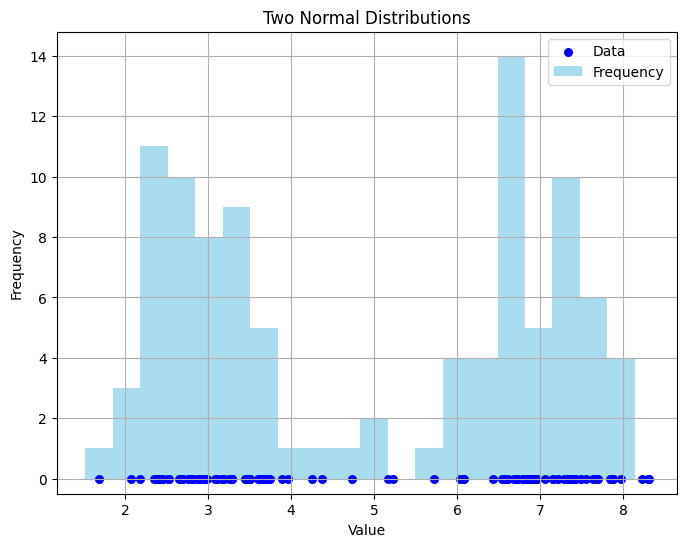

In [4]:
plot_data(data)

### 1.2 Inicialización de parametros

Vamos a inicializar los parametros de forma aleatorias. Para cada cluster vamos a definir una media y una desviación estandar dentro de un rango específico.


In [5]:

def init_random_parameters(K, mean_range=(0, 10), std_range=(0, 1)):
  means = np.random.uniform(*mean_range, size=K)
  stds = np.random.uniform(*std_range, size=K)

  P = np.column_stack((means, stds)).tolist()

  return P

In [6]:
P = init_random_parameters(2)
P

[[8.887017595316342, 0.8337612109497042],
 [4.162545555617933, 0.5757099105191995]]

### 1.3 Función de Verosimilitud

La función `calculate_likelihood_gaussian_observation` calcula el logaritmo de la verosimilitud (likelihood) de una observación `x_n` dada una distribución gaussiana con media `mu_k` y desviación estándar `sigma_k`.

La función primero verifica si `sigma_k` es igual a cero, en cuyo caso devuelve `None`, ya que una desviación estándar de cero no es válida en una distribución gaussiana. Si `sigma_k` no es cero, calcula el logaritmo de la verosimilitud de `x_n` según la fórmula de la distribución gaussiana. El logaritmo se toma para evitar problemas de precisión numérica al trabajar con números muy pequeños.

El resultado, `log_likelihood`, representa cuán probable es que la observación `x_n` haya sido generada por una distribución gaussiana con los parámetros dados. Este valor se utiliza comúnmente en algoritmos de estimación de parámetros y clasificación basados en modelos probabilísticos, donde se busca encontrar los parámetros que maximizan la verosimilitud de los datos observados.

In [7]:
import numpy as np

def calculate_likelihood_gaussian_observation(x_n, mu_k, sigma_k):
     if sigma_k == 0:
          return None
     else:
          log_likelihood = -0.5 * np.log(2 * np.pi * sigma_k**2) - 0.5 * (1 / sigma_k) * (x_n - mu_k)**2
          return log_likelihood


#### 1.3.1 Pruebas Unitarias

A continuación se haran unas pruebas unitarias con valores conocidos del algoritmo de verosimilitud.

Estas pruebas evalúan el cálculo del logaritmo de la verosimilitud (likelihood) de una observación en relación con una distribución gaussiana con parámetros mu_k (media) y sigma_k (desviación estándar).


In [8]:
import unittest
import numpy as np

class TestCalculateLikelihood(unittest.TestCase):

    def test_likelihood_with_zero_sigma(self):
        x_n = 1.0
        mu_k = 1.0
        sigma_k = 0.0
        result = calculate_likelihood_gaussian_observation(x_n, mu_k, sigma_k)

        self.assertIsNone(result)

    def test_likelihood_1(self):
        sigma_k = 1.0
        x_n = 0.0
        mu_k = 0.0

        result = calculate_likelihood_gaussian_observation(x_n, mu_k, sigma_k)

        expected_result = -0.9189385332046727
        self.assertAlmostEqual(result, expected_result, places=5)

    def test_likelihood_2(self):
        sigma_k = 2.0
        x_n = 3.0
        mu_k = 1.5

        result = calculate_likelihood_gaussian_observation(x_n, mu_k, sigma_k)
        expected_result = -2.174585713764618
        self.assertAlmostEqual(result, expected_result, places=5)


In [9]:
if __name__ == '__main__':
    loader = unittest.TestLoader()
    suite = loader.loadTestsFromTestCase(TestCalculateLikelihood)
    runner = unittest.TextTestRunner()
    runner.run(suite)


...
----------------------------------------------------------------------
Ran 3 tests in 0.002s

OK


### 1.4 Calculate Membership


La función `calculate_membership_dataset` calcula la matriz de pertenencia para un conjunto de datos `X_dataset` en relación con un conjunto de parámetros de distribución gaussiana `Parameters_matrix`. La matriz de pertenencia asigna a cada punto en el conjunto de datos una medida de su pertenencia a cada uno de los K clusters representados por los parámetros en `Parameters_matrix`. El código recorre el conjunto de datos, calcula la verosimilitud de pertenencia a cada cluster utilizando la función `calculate_likelihood_gaussian_observation`, y construye la matriz de pertenencia, que se devuelve al final.

In [10]:
def calculate_membership_dataset(X_dataset, Parameters_matrix):
  clusters = len(Parameters_matrix)
  membership_matrix = []

  for row in X_dataset:
    m_index = []

    for k in range(clusters):
      like_index = calculate_likelihood_gaussian_observation(x_n=row[0], mu_k=Parameters_matrix[k][0], sigma_k=Parameters_matrix[k][1])
      m_index.append(like_index)
    membership_matrix.append(m_index)

  return membership_matrix

#### 1.4.1 Calculate Membership Binary


Vamos a utilizar esta función auxiliar para visualizar los resultados. Esta función convierte una matriz de pertenencia en una matriz binaria donde cada punto de datos pertenece a un único cluster representado por el valor de 1 en la columna correspondiente.
La entrada es una matriz de pertenencia 'membership_matrix' y la salida es la matriz binaria 'result_matrix'. Esto nos ayuda a verificar el funcionamiento de la matriz de membership.

In [11]:
def make_membership_binary(membership_matrix):
  membership_matrix = np.array(membership_matrix)

  max_indices = np.argmax(membership_matrix, axis=1)
  result_matrix = np.zeros_like(membership_matrix)
  result_matrix[np.arange(membership_matrix.shape[0]), max_indices] = 1

  return result_matrix


In [12]:
membership_matrix = calculate_membership_dataset(data, P)
membership_matrix

[[-4.018521785201827, -5.308153111943766],
 [-27.694226885583408, -3.772041850396423],
 [-2.0379315069442114, -9.549732685252751],
 [-18.349650598771884, -0.7861345329519835],
 [-3.0971483543911833, -6.890378995655985],
 [-20.381332864538233, -1.2333948435489093],
 [-22.928513064901733, -1.9700135862729755],
 [-8.73752753685619, -1.364771501906897],
 [-20.36737792442116, -1.2298705184715197],
 [-22.982399886926267, -1.9874807145027278],
 [-15.27947547133534, -0.40150084417361603],
 [-23.904928875673765, -2.297669622767164],
 [-13.632499524889068, -0.3734069689133413],
 [-5.479456570263984, -3.542993651507371],
 [-0.9423439314080357, -15.248776455883348],
 [-1.581808766112509, -11.236016259486028],
 [-16.597949766023966, -0.5187634759714392],
 [-1.6724267303039364, -10.858133850090042],
 [-23.71725151564741, -2.2328869016922552],
 [-26.092262057825785, -3.1118907665232816],
 [-31.84879980856515, -5.700890632830622],
 [-4.346564604912493, -4.846561065879983],
 [-5.509579346883578, -3.513

In [13]:
binary_membership_matrix = make_membership_binary(membership_matrix)
binary_membership_matrix

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.

### 1.5 Recalculate Parameters
    
Recalcula parámetros estadísticos a partir de datos de pertenencia.

Esta función toma dos matrices como entrada, `X_dataset` y `Membership_data`, 
y calcula estadísticas específicas para cada grupo definido por los valores en `Membership_data`. Recalcula los parametros generando nuevas medias y desviaciones estandar sobre las clusters a los que es más probable pertenecer


In [14]:
import torch

def recalculate_parameters(X_dataset, Membership_data):
    X_torch = torch.tensor(X_dataset, dtype=torch.float32)
    Membership_torch = torch.tensor(Membership_data, dtype=torch.float32)

    max_column_indices = torch.argmax(Membership_torch, dim=1)

    matrix = [[] for _ in range(len(Membership_data[0]))]


    for i in range(len(X_torch)):
        matrix[max_column_indices[i].item()].append(X_torch[i].item())

    means = torch.tensor([torch.mean(torch.tensor(row)) for row in matrix], dtype=torch.float32)
    std = torch.tensor([torch.std(torch.tensor(row)) for row in matrix], dtype=torch.float32)

    result_matrix = torch.stack((means, std), dim=1).numpy()


    return result_matrix



In [15]:
new_params_matrix = recalculate_parameters(data, membership_matrix)
new_params_matrix

array([[7.254474 , 0.4997478],
       [3.4102297, 1.0789393]], dtype=float32)

Adicionalmente, tenemos esta función auxiliar para graficar dos dsitribuciones sobre el mismo gráfico

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def plot_multiple_normal_distributions(means, stds, num_points=1000, it=0):
    x = np.linspace(min(means) - 3 * max(stds), max(means) + 3 * max(stds), num_points)

    for mean, std in zip(means, stds):
        # Truncate mean and std to two decimal places
        mean_str = "{:.2f}".format(mean)
        std_str = "{:.2f}".format(std)

        pdf = norm.pdf(x, loc=mean, scale=std)
        plt.plot(x, pdf, label=f'Mean={mean_str}, Std={std_str}')

    plt.title(f'Normal Distributions for iteration {it}')
    plt.xlabel('X')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.grid(True)
    plt.show()


### 1.6 Prueba de Algoritmo

Vamos a correr el algoritmo por 5 épocas. La idea es que a lo largo de cada epocas las graficas se asemejen a la gráfica real. 

El primer paso es inicializar las variables. Tenemos unos parametros reales y unos aleatorios. Notese que los datos los vamos a generar con los parametros reales.

In [17]:
EPOCHS = 5
K = 2




P = init_random_parameters(K=K, mean_range=(0, 50), std_range=(0, 15))  
P = np.array(P)

true_P = init_random_parameters(K=K, mean_range=(0, 50), std_range=(0, 15))
true_P = np.array(true_P)
X = generate_data(N=100, means=true_P[:, 0], stds=true_P[:, 1], K=K)

true_P


array([[23.87877699,  9.60148411],
       [15.57179771,  7.68743598]])

Esta es la gráfica de las distribuciones reales. La idea es que los parametros (media y desviación) se ajemen a esta.

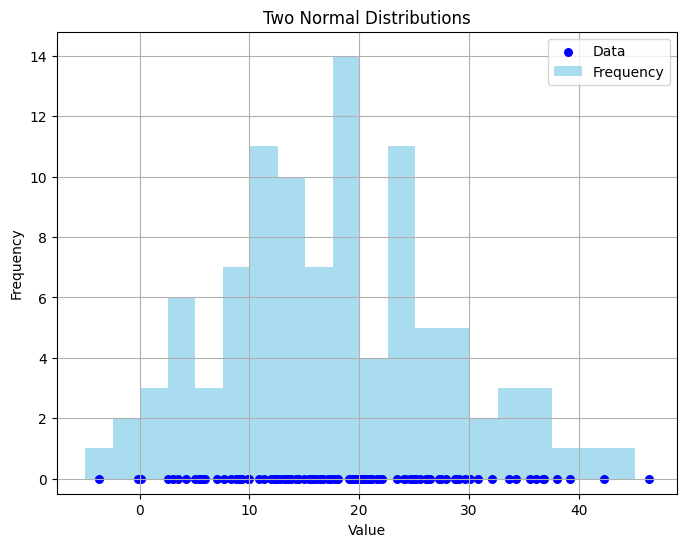

In [18]:
plot_data(X)

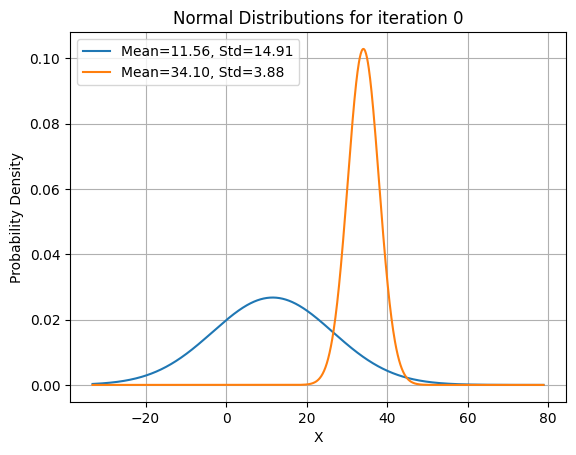

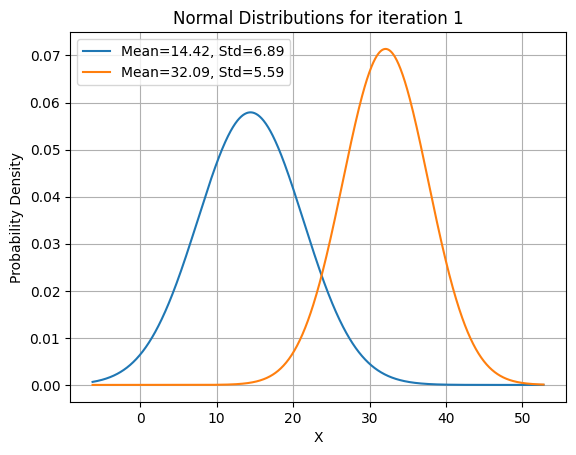

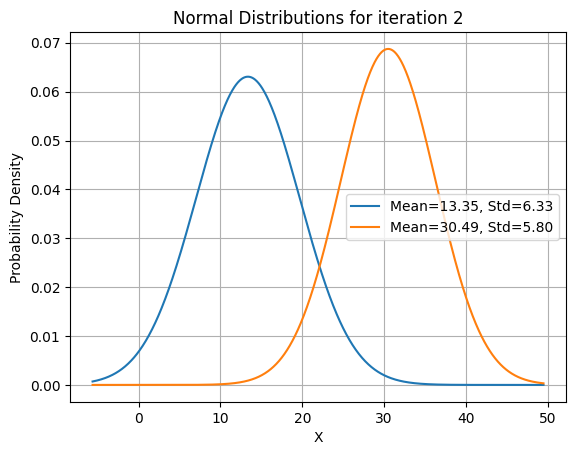

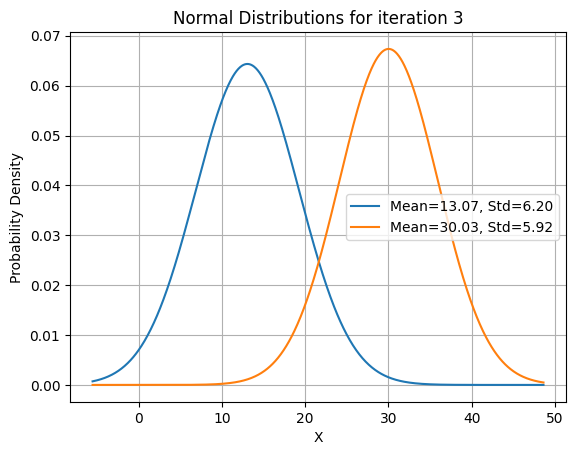

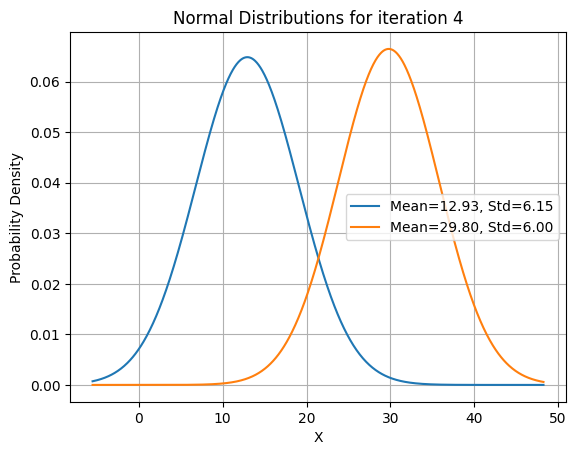

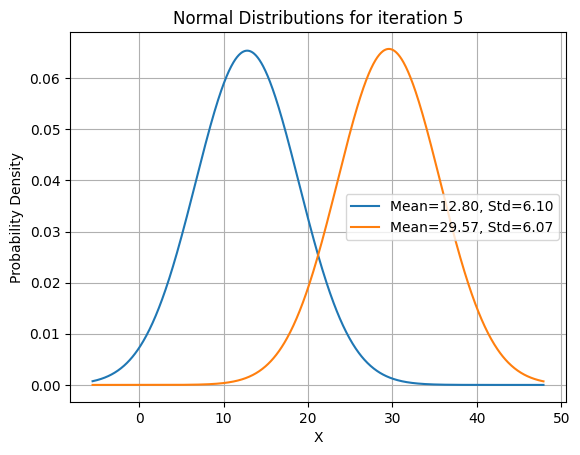

In [19]:
plot_multiple_normal_distributions(means=P[:, 0], stds=P[:, 1])

for i in range(EPOCHS):    
    membership_matrix = calculate_membership_dataset(X, P)
    P = recalculate_parameters(X, membership_matrix)
    plot_multiple_normal_distributions(means=P[:, 0], stds=P[:, 1], it=i + 1)


### 1.7 Mejor inicializacion de datos

Actualmente, las medias y desviaciones estandar se estan inicializando de manera aleatoria. Sin embargo, presentaria una mejor opción inicializarlas con valores fijos. A continuación vamos a proponer inicializarlos con un valores de medias que esten relativamente muy distantes entre si. Sin embargo, vamos a mantener el mismo valor de desviacion estandar. 

In [20]:
import numpy as np

def init_fixed_parameters(K, mean_values=None, std_value=15.0):
    if mean_values is None:
        mean_values = [1.0] * K

    means = np.array(mean_values)
    stds = np.full(K, std_value)

    P = np.column_stack((means, stds)).tolist()

    return P

In [21]:

mean_values = [5.0, 55.0]

P = init_fixed_parameters(K=K, mean_values=mean_values)  
P = np.array(P)


P

array([[ 5., 15.],
       [55., 15.]])

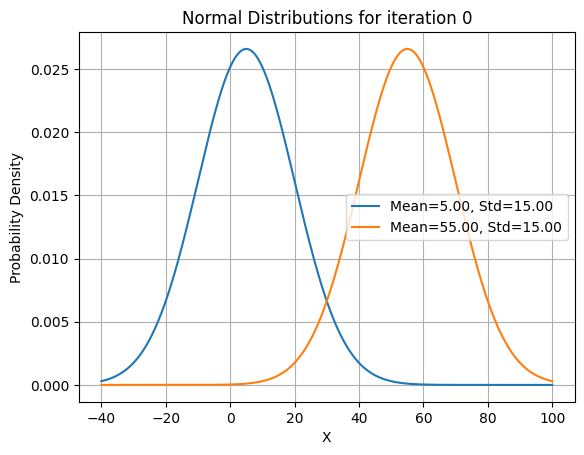

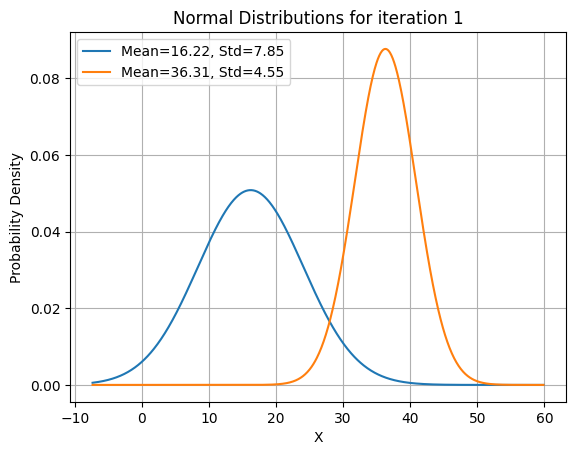

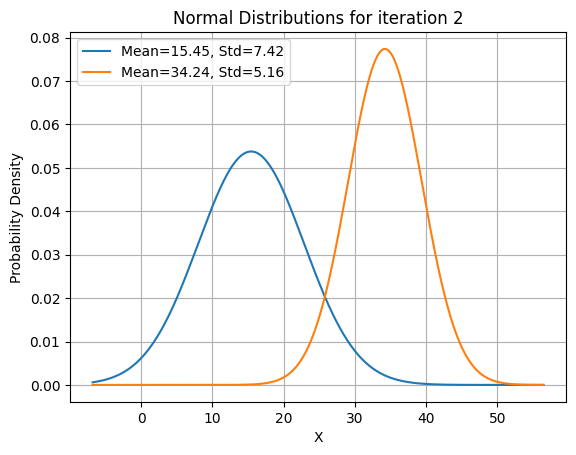

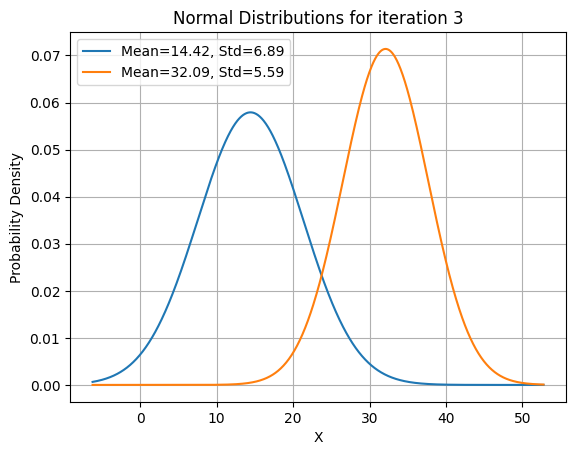

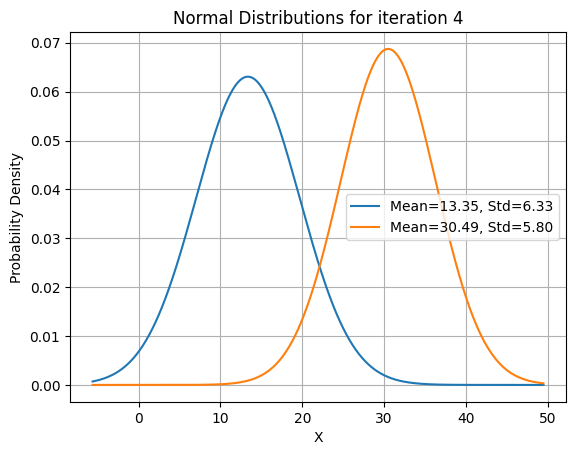

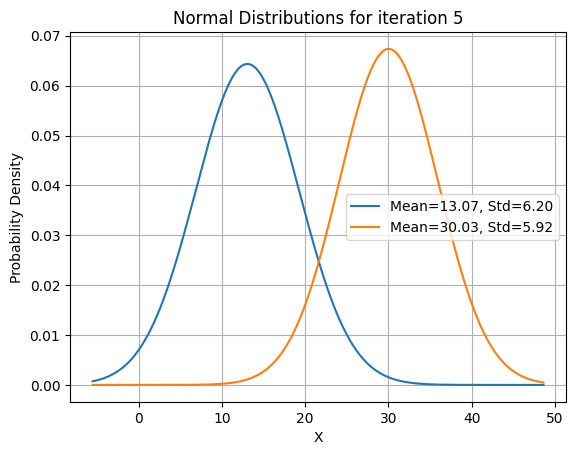

In [22]:
plot_multiple_normal_distributions(means=P[:, 0], stds=P[:, 1])

for i in range(EPOCHS):    
    membership_matrix = calculate_membership_dataset(X, P)
    P = recalculate_parameters(X, membership_matrix)
    plot_multiple_normal_distributions(means=P[:, 0], stds=P[:, 1], it=i + 1)


Vemos que, al mantener la misma "figura" de las campanas pero separadas entre si, se genera una convergencia más rapida que con parametros inicializados aleatoriamente. Claramente depende de la aleatoriedad, pero si dos medias son inicializadas de valores muy cercanos el algoritmo de verosimilitud no va a ser tan eficiente.